In [147]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Non-DataScience/ML packages
import chardet
import re
import string

In [148]:
path="../../../../Datafiles/"
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
df = pd.read_excel(path + file, header=4)
print("there are {} entries in the data frame".format(len(df)))

there are 351 entries in the data frame


In [149]:
# Let's clean up the column names
colnames = df.columns
newcolnameslist = []

for colname in colnames:
    newcolname=colname.replace('\n','').replace(' ','').capitalize() # strip out newlines, spaces, and captitalize
    newcolname=re.sub(r'\([^)]*\)', '', newcolname)                  # remove parenthesized stuff
    newcolnameslist.append(newcolname)                               # put all the column names into a list 

df.columns = newcolnameslist
print(newcolnameslist)

['City', 'Population', 'Violentcrime', 'Murderandnonnegligentmanslaughter', 'Rape1', 'Rape2', 'Robbery', 'Aggravatedassault', 'Propertycrime', 'Burglary', 'Larceny-theft', 'Motorvehicletheft', 'Arson3']


In [150]:
df.tail(5)

,City,Population,Violentcrime,Murderandnonnegligentmanslaughter,Rape1,Rape2,Robbery,Aggravatedassault,Propertycrime,Burglary,Larceny-theft,Motorvehicletheft,Arson3
346,Yonkers,199134.0,1036.0,6.0,NaN,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0,10.0
347,Yorktown Town,36643.0,15.0,0.0,NaN,0.0,2.0,13.0,334.0,45.0,287.0,2.0,NaN
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df[df['City'].str.contains('figures shown')]
df[df['City'].str.contains('publish')]

df = df[(df['City'].str.contains('figures shown') == False)] # We don't want any documentation rows
df = df[(df['City'].str.contains('publish') == False)]       # We don't want any other documentation rows
df = df[(df['City'].str.contains('New York') == False)]       # Remove the outlier
df = df[(df['City'].str.contains('Buffalo') == False)]       # Remove the outlier
df = df[(df['City'].str.contains('Rochester') == False)]       # Remove the outlier
df = df[(df['City'].str.contains('Syracuse') == False)]       # Remove the outlier
df = df[(df['City'].str.contains('Yonkers') == False)]       # Remove the outlier

# All Rape1 values are false
# No Rape2 values are true
# Arson3 NaN's -> 161
# There are 161 NaN entries for Arson3
# Remove New York City -- it's an outlier.

In [152]:
df['PopulationSquared'] = df.Population.pow(2)

df['Robbery'] = np.where(df['Robbery']>=1, 1, 0.0)
df = df.rename(columns={'Arson3': 'Arson', 'Rape2': 'Rape', 'Aggravatedassault': 'AggravatedAssault',
                        'Violentcrime':'ViolentCrime','Propertycrime': 'PropertyCrime', 
                        'Larceny-theft':'LarcenyTheft','Motorvehicletheft':'MotorVehicleTheft'})
# df.Arson = df.Arson.astype(int) # Let's make it an int
df['Murder'] = np.where(df['Murderandnonnegligentmanslaughter']>=1, 1, 0.0)
df.Arson.fillna(0, inplace=True) # Let's clean up Arson3

In [153]:
df.head(10)
# df.describe()

,City,Population,ViolentCrime,Murderandnonnegligentmanslaughter,Rape1,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorVehicleTheft,Arson,PopulationSquared,Murder
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,1.0,526.0,4090.0,705.0,3243.0,142.0,0.0,9.595378e+09,1.0
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,1.0,16.0,223.0,53.0,165.0,5.0,0.0,4.080654e+07,0.0
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,1.0,2.0,46.0,10.0,36.0,0.0,0.0,1.671992e+07,0.0
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0,3.171961e+06,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,1.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1.399394e+10,1.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,1.0,3.0,210.0,16.0,188.0,6.0,1.0,9.061136e+07,0.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,1.0,18.0,405.0,99.0,291.0,15.0,0.0,3.305851e+08,0.0


In [154]:
num_columns = ['Population', 'ViolentCrime', 'Rape', 'AggravatedAssault', 'PropertyCrime', 'Burglary','LarcenyTheft',
                                               'MotorVehicleTheft', 'Arson']
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df[num_columns])
df_normalized = pd.DataFrame(scaled_array)

In [155]:
df_normalized.columns = num_columns
df_normalized.describe()

,Population,ViolentCrime,Rape,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorVehicleTheft,Arson
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.113376,0.037886,0.056333,0.035393,0.073585,0.063961,0.075043,0.054968,0.020247
std,0.149680,0.108635,0.131680,0.100714,0.123697,0.127118,0.123774,0.131631,0.081392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020540,0.002528,0.000000,0.001901,0.009535,0.007802,0.009405,0.000000,0.000000
50%,0.056559,0.007585,0.000000,0.007605,0.027139,0.022107,0.028060,0.013072,0.000000
75%,0.147648,0.026549,0.064516,0.025665,0.082029,0.065020,0.085106,0.042484,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


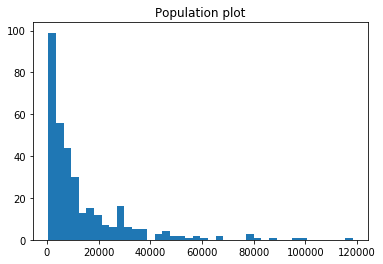

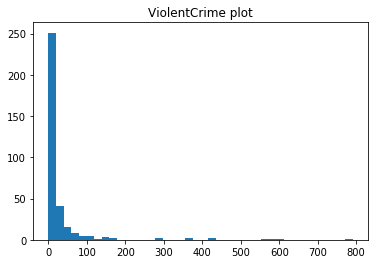

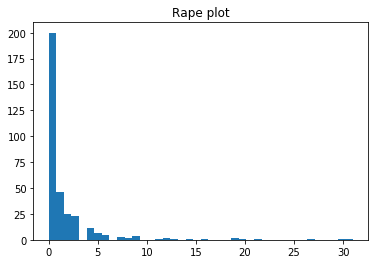

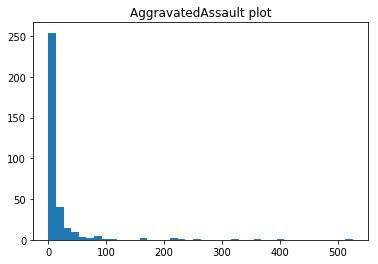

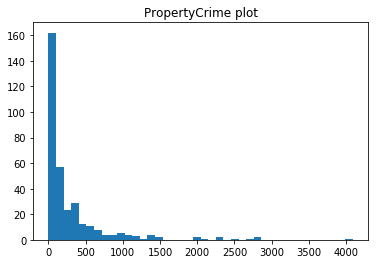

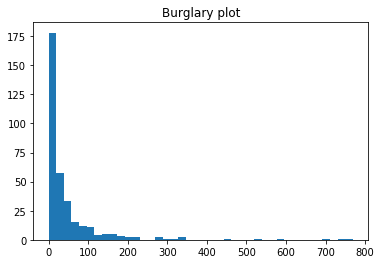

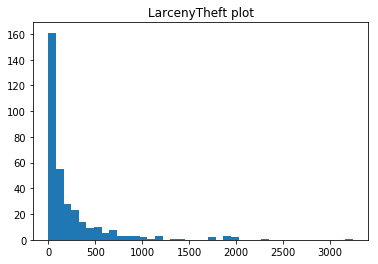

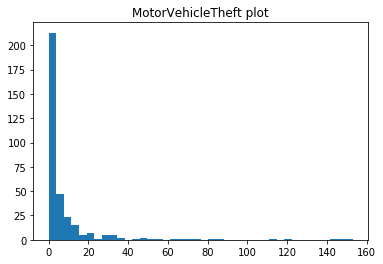

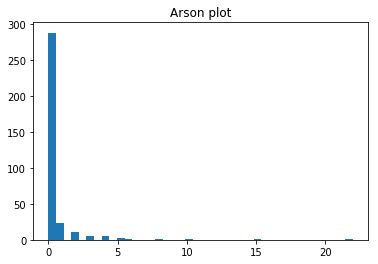

In [156]:
# plt.scatter(df_normalized['Population'], df_normalized['AggravatedAssault'])
# plt.scatter(df_normalized['Population'], df_normalized['Burglary'])
# plt.scatter(df_normalized['Population'], df_normalized['MotorVehicleTheft'])

    
for col in num_columns:
    plt.hist(df[col], bins=40)
    plt.title(col + " plot")
    plt.show()